<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 04 - Clustering: What is it all about?</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br>
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br>
Loïc Van Hoorebeeck (loic.vanhoorebeeck@uclouvain.be)<br>
Jérome Eertmans (jerome.eertmans@uclouvain.be)<br>
Sébastien Colla (sebastien.colla@uclouvain.be)<br>
Dani Manjah (dani.manjah@uclouvain.be)<br>
<div style="text-align: right"> Version 2021</div>

<br><br>
</font>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  This assignment is due on the <b>18-12-2021 at 23h59</b>.
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups,...) must be clearly indicated!</b>
-  This notebook (with the "ipynb" extension) file, the Python source file (".py"), and the report (PDF format) must be delivered on <b>Moodle</b>.
- Only the PDF report and the python source file will be graded, both on their content and the quality of the text / figures. <br><br>

<div class="alert alert-danger">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> a Python file with your classifier implementation. Please follow the template that is provided and ensure it passes the so-called <i>sanity</i> tests;
   <li> and this Jupyter Notebook (it will not be read, just checked for plagiarism).
</ol>
</div>

<font size=5 color=#009999> <b>CONTEXT & NOTEBOOK STRUCTURE</b> </font> <br>
    
The objective of this hackathon is threefold: (1) extract meaningful information from a dataset, (2) observe relationship(s) (if any) between features and eventual underlying groups (clusters), and (3) develop an unsupervised clustering tool. To this end, you will use a public dataset from Netflix (available on <b>Moodle</b>), alongside with a file describing the different ratings. Given a couple of features, you should be able to group movies (and TV shows) belonging to similar ratings.

<img src="Imgs/image_article_binge_watching.png" width = "600">

Nowadays, the internet is crowded with millions of videos coming out every day. This is especially true on streaming platforms such as YouTube or Netflix. To keep their platform well organized, most of those companies rely on automated classification. For example, a video can be automatically classified to be rated R if it contains obscene scenes. <br> <br>
Still, for most movies and TV-shows, this classification job is achieved manually... quite a <i>tedious</i> task... Your role aims at determining the implementation feasibility of an automated rating classification based on attributes such as *movie title* or the *actor/actress* that appear in it.

This notebook is organized into three parts. Each of them assesses one fundamental step to solve our problem and provides one visualization tool to gain some understanding:
* PART 1 - DATA PREPROCESSING
   - 1.1 - Import the data
   - 1.2 - Text data preprocessing
   - 1.3 - Preliminary visualization tool 
    <br><br>
* PART 2 - DATA VISUALIZATION 
   - 2.1 - PCA 
    <br><br>
* PART 3 - IT'S TIME TO... CLUSTER!
   - 3.1 - Customized K-Prototypes
   - 3.2 - Results analysis 
   
We filled this notebook with preliminary (trivial) code. This practice makes possible to run each cell, even the last ones, without throwing warnings. <b>Take advantage of this aspect to divide the work between all team members!</b> <br><br>

In [2]:
import copy

"""
CELL N°0 : CHECK FOR NEW PACKAGES
We added a few more package depedencies since S1, therefore we need to install them.
Here, the process should be fully automated.
"""

# Few more packages we did not specify in previous requirements.txt
# This should automatically install them.
# If your installation is broken, please follow the same guidelines as in S1,
# but with the new requirements.txt file
try:
    import wordcloud
except ImportError as e:
    !python -m pip install wordcloud
try:
    import seaborn
except ImportError as e:
    !python -m pip install seaborn

<br><font size=7 color=#009999> <b>PART 1 - DATA PREPROCESSING</b> </font> <br><br>

<font size=5 color=#009999> <b>1.1 - IMPORT THE DATA</b> <br>
"Netflix Shows" dataset
</font> <br> <br>

In this __[dataset](https://www.kaggle.com/shivamb/netflix-shows)__, you are provided with movies and TV-shows, each having a series of features that will be useful all along this hackathon. If you are curious, the aforementionned link proposes several questions to be answered with this very dataset.

In [3]:
"""
CELL N°1 : IMPORT THE DATASET
"""

import numpy as np
import pandas as pd
from IPython.display import display, Markdown as md
from collections import Counter

# See toolbox.py file
import toolbox as tb

pd.set_option("max_colwidth", 200)

dataPath = "Data/netflix_titles.csv"
descPath = "Data/netflix_description.csv"
df = pd.read_csv(dataPath)
desc = pd.read_csv(descPath, sep="\t")

# Print first rows
display(md("# Netflix titles"))
display(df.head())

# Print content of ratings' description
display(md("# Ratings' description"))
display(desc)

# Netflix titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.


# Ratings' description

,rating,description
0,TV-MA,"This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17"
1,R,"Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian"
2,PG-13,Some Material May Be Inappropriate for Children Under 13
3,TV-14,This program may be unsuitable for children under 14 years of age
4,TV-PG,This program contains material that parents may find unsuitable for younger children. Parental guidance is recommended
5,NR,"This means no version was submitted for review by the MPAA, and has no rating in any version"
6,TV-G,This program is suitable for all ages.
7,TV-Y,"This program is aimed at a very young audience, including children from ages 2–6"
8,TV-Y7,This program is most appropriate for children age 7 and up
9,PG,Some Material May Not Be Suitable for Children


<br>
<font size=5 color=#009999> <b>1.2 - FEATURES PREPROCESSING</b> <br>
REMOVING UNNECESSARRY INFORMATION, CLEANING DATASET AND CREATING NEW FEATURES
</font> <br> <br>

When doing data sciences, the datasets you are using were most probably not made for your very application. Instead, they result from the collection of information throughout a certain period of time, and it is the data scientist's job to make a good use of those datasets.

Today, the goal is to predict the `rating` category based on several other features. Therefore, you should be able to determine which of those are useful for your application.

<div class="alert alert-warning">
<b>[Question 1.1] Removing unnecessary features </b>  <br>
Can you already, a priori, detect that some features are useless?
<ol>
   <li> if yes, list those (useless) features;
   <li> if not, then explain why it is better to wait.
</ol>
    Generally speaking, is it a good idea to remove a feature based on <i>a priori</i> knowledge, or it doesn't alter the final outcome?
</div>

<div class="alert alert-info">
<b>[Remark]</b><br>
For the sake of simplicity, the test data will not contain any NaN. <br>However, we expect you to think about what you should do to handle NaNs.
</div> 

In [4]:
"""
CELL N°2 : REMOVING UNNECESSARY FEATURES
If you answered yes in previous question, please remove those features here.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

print(df.columns)

features = ['show_id']

#########################################################################################################
# End : Student version
#########################################################################################################


df.drop(labels=features, axis=1, inplace=True, errors="ignore")

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


<div class="alert alert-info">
<b>[Remark]</b><br>
In most real-cases, the datasets you are going to work with will contain artifacts, such as typos or missing data, that you may want to remove before feeding the data into any algorithm. Here, Pandas treats missing data as NaNs (refering to Not a Number, even though it is used for every missing object, no only numbers).
</div> 

Can you find a way to inspect your dataset and see the proportion of missing data?

In [5]:
"""
CELL N°3 : INFORMATION ABOUT TYPES AND NANs
Use one (or more) of Pandas' builtin function to get information about data types
and the number of missing (NaN) values for each feature.
Do not reinvent the wheel: a good data-scientist is a lazy d-s.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################
print("--INFO ABOUT TYPES ANS NAN--")
print(df.info())
print("--PROPORTION--")
df.isnull().sum()/len(df)



#########################################################################################################
# End : Student version
#########################################################################################################



--INFO ABOUT TYPES ANS NAN--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB
None
--PROPORTION--


type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

<div class="alert alert-info">
<b>[Remark] Each problem has its own solution</b> <br>
There exists numerous ways to deal with missing information and we will discuss the two main approaches:
<ol>
   <li> You remove rows or columns that contain missing data;
   <li> You replace NaNs with a another value. The latter can be a fixed value or computed to be the mean of all non-NaNs values. The topic of replacing missing data, also call imputation of missing values, is very broad and complex, and there is no global solution that applies everywhere. Maybe you can find one that works well here?
</ol>
</div> 

You **should** read more about how to imput missing value [here](https://scikit-learn.org/stable/modules/impute.html).

<div class="alert alert-warning">
<b>[Question 1.2] Handling missing data </b>  <br>
Given the dataset and the amount / type of missing information, what strategy do you propose to follow regarding missing data (NaNs) ?<br> You can choose one or many of the following:
<ol>
   <li> drop features (column) with missing information; 
   <li> drop samples (row) with missing information;
   <li> replace missing information with interpolation / extrapolation / simple substitution / ...
</ol>
</div> 

In [6]:
"""
CELL N°4 : HANDLING NANs
Please fill the gaps according to what you have decided to do. Feel free to modify the code.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

drop_rows = None  # set `drop_rows = None` to select all rows

drop_cols = [
    'director'
]
# set `drop_cols = None` to select all columns

# Fill special substitution here (e.g.: every NaN becomes an empty string "")

#########################################################################################################
# End : Student version
#########################################################################################################

for col in drop_cols:
    # For each mentionned column, drop it if it contains `any` NaN
    if df[col].isnull().values.any():
        df.drop(col, axis=1, inplace=True)

df.dropna(
    axis=0, subset=drop_rows, inplace=True
)  # Drop rows with NaN in any of the mentionned columns

# Last, we drop all rows with missing `rating` as it is useless to keep them in our model
df.dropna(
    axis=0, subset=["rating"], inplace=True
)  # Drop rows with NaN in any of the mentionned columns

df.isnull().sum()/len(df)

type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

<div class="alert alert-info">
<b>[Remark] New features extraction</b> <br>
In the present case, some features in the dataset still need to be reworked in order to provide meaningful information. For example, the <samp>cast</samp> feature is a string listing multiple names. As it could be interesting to see if the presence of a given actor is linked to the rating (e.g.: some actors mostly play in comedy movies), you could extract all the actor names from this feature. Note that another aspect you could consider/take into account is the relative frequency of an actor apparition in the shows.
</div>

The following code will show you how to get the list of the actors playing in each of the shows.

# In total
        There are 31685 actors
        An average of 4.8 actors per movie / TV-shows
        [João Miguel, Bianca Comparato, ..., Adriano Zumbo, Rachel Khoo]

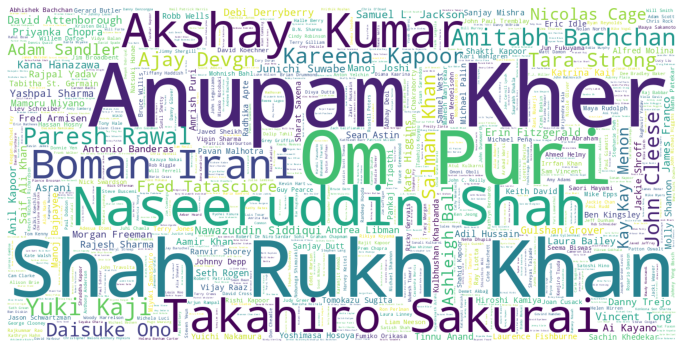

In [7]:
"""
CELL N°5 : MANIPULATING FEATURES
Read the code carefully and try to understand it.
"""

feature = "cast"

# In case we did not drop NaNs for `feature`, we do it now (or you can substitute NaNs with empty str)
df.dropna(
    axis=0, subset=[feature], inplace=True
)  # Drop rows with NaN in any of the mentionned columns

casting = []  # List of all actor names

for movie_cast in df[feature].dropna():  # For all movies / TV-shows cast
    casting.extend(  # We extend the list of actor names
        movie_cast.split(", ")  # with the list of names in current movie
    )

actors = set(casting)  # removes duplicates
display(
    md(
        f"""# In total
        There are {len(actors)} actors
        An average of {len(actors) / df.shape[0]:.2} actors per movie / TV-shows
        [{", ".join(casting[:2])}, ..., {", ".join(casting[-2:])}]"""
    )
)

tb.word_cloud(casting)  # Plots a WordCloud of actor names

Here, you don't have new features **yet**. You still need to somehow incorporate the information about actor names into the dataset in a more **intelligent** manner than it was before. Again, there can be multiple solutions, and we will propose you a very simple one.

For every actor name in the list, we will create a new column (feature) in the dataset that will tell, for every row (sample), if the actor plays in that movie or not. This produces something similar to [One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). As there are many actors, many more than there are samples, we suggest you to only select the top-100 actors, by number of appearances.

In [8]:
"""
CELL N°6 : CREATING FEATURES
Read the code carefully and try to understand it.
Feel free to modify the number `n`.
"""

counts = Counter(casting)  # For each name, counts how many times it appears

n = 100  # number of selected actors among the most appearing
top_n = counts.most_common(n)  # Top n names by decreasing order of appearance

display(pd.DataFrame(top_n, columns=["name", "count"]).T)

series = {}
for name, count in top_n:
    series[name] = (
        df[feature].str.contains(name).astype(int)
    )  # Does a cast contain the name of the actor?

# We create a new dataset (we could use the same name though)
casting_df = pd.concat(
    series, axis=1
)  # DataFrame where each row contains 0 or 1 depending on if the name appears in casting
dataset = pd.concat([df, casting_df], axis=1)
# We drop `cast` feature since we do not need it anymore
dataset.drop(labels=["cast"], axis=1, inplace=True, errors="ignore")
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
name,Anupam Kher,Shah Rukh Khan,Om Puri,Naseeruddin Shah,Akshay Kumar,Takahiro Sakurai,Boman Irani,Amitabh Bachchan,Paresh Rawal,Yuki Kaji,...,Seema Biswas,Mohnish Bahl,Ray Liotta,Mithun Chakraborty,Jun Fukuyama,Rishi Kapoor,Miyuki Sawashiro,Kari Wahlgren,Jim Broadbent,Sam Vincent
count,42,34,30,29,29,28,27,27,27,27,...,13,13,13,13,13,13,13,13,13,13


,type,title,country,date_added,release_year,rating,duration,listed_in,description,Anupam Kher,...,Seema Biswas,Mohnish Bahl,Ray Liotta,Mithun Chakraborty,Jun Fukuyama,Rishi Kapoor,Miyuki Sawashiro,Kari Wahlgren,Jim Broadbent,Sam Vincent
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",0,...,0,0,0,0,0,0,0,0,0,0
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",0,...,0,0,0,0,0,0,0,0,0,0
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",0,...,0,0,0,0,0,0,0,0,0,0
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",0,...,0,0,0,0,0,0,0,0,0,0
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,0,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-warning">
<b>[Question 1.3] All-zero representations? </b>  <br>
For configurations <samp>n=100</samp> and <samp>n=None</samp>, count the number of sample whose encoded vector is the null vector [0, 0, ..., 0] (in <samp>casting_df</samp>). Why are there such vectors? How will they be treated by the clustering algorithm? <br>
    
<i>Note: <samp>n=None</samp> will select all the names, so it might take time and memory space!</i>
</div>

In [9]:
print(f"Number of samples with null vector, n = 100 : {(casting_df==0).all(axis=1).sum()}")
print(f"Number of samples with null vector, n = # actors : {0}")
# avec None le result sera 0 car on a drop les lignes qui n'ont pas d'acteurs

Number of samples with null vector, n = 100 : 5636
Number of samples with null vector, n = # actors : 0


<div class="alert alert-success">
<b>[Bonus]</b>  <br>
    In the case of the <samp>description</samp> feature, where each sample is a sentence, you could use more complex tools to extract information (e.g.: verbs, nouns, average sentence length, buzz words, etc.). Here, we can name a few:
<ol>
    <li> Regular Expression (with Python's package <a href="https://docs.python.org/3.8/library/re.html", target="_blank"><samp>re</samp></a>). We recommend <a href="https://regexone.com/", target="_blank">this blog</a> to understand how it works and <a href="https://regexr.com/", target="_blank">regexr.com</a> for testing your regular expressions;
   <li> Natural Language Processing (NLP) with <a href="https://www.nltk.org/", target="_blank"><samp>nltk</samp></a>. Please read <a href="https://pub.towardsai.net/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0", target="_blank">this</a> for more information about NLP.
</ol>
</div> 

<div class="alert alert-warning">
<b>[Question 1.4] Feature extraction </b>  <br>
Repeat the previous process for other features than <samp>cast</samp>. Some may require additional pre-processing. You might want to reuse the code above, or create a separate function to avoid code repetition. Do as you prefer!
Then, answer the following questions:
<ol>
   <li> Which <b>new</b> features produce meaningful information for your classification?
   <li> If it applies, explain the extra pre-processing you did to extract specific features.
</ol>
When answering, please provide quantitative (plots, measures, ...) information to support your claims.
</div> 

In [10]:
"""
CELL N°7 : OTHER NEW FEATURES
Example of new feature creation. Please provide below your code that produces your own (new) features.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

try:
    dataset["title-length"] = dataset["title"].str.len()  # Is title length related to rating? Who knows
except KeyError:
    pass  # In case you remove the `title` feature ;-)

feature = "listed_in"
genre = []  # List of all genre names

for movie_cast in dataset[feature].dropna():  # For all movies / TV-shows cast
    genre.extend(  # We extend the list of genre names
        movie_cast.split(", ")  # with the list of names in current movie
    )

counts = Counter(genre)  # For each name, counts how many times it appears
n = None  # number of selected genres among the most appearing
top_n = counts.most_common(n)  # Top n names by decreasing order of appearance

display(pd.DataFrame(top_n, columns=["name", "count"]).T)

series = {}
for name, count in top_n:
    series[name] = (
        dataset[feature].str.contains(name).astype(int)
    )  # Does a cast contain the name of the genre?



#########################################################################################################
# End : Student version
#########################################################################################################

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
name,International Movies,Dramas,Comedies,International TV Shows,Action & Adventure,Independent Movies,TV Dramas,Romantic Movies,Thrillers,Children & Family Movies,...,Cult Movies,Teen TV Shows,Anime Features,Science & Nature TV,Faith & Spirituality,TV Thrillers,Stand-Up Comedy & Talk Shows,Movies,Classic & Cult TV,TV Shows
count,2200,2053,1423,969,700,668,618,516,479,466,...,57,57,55,52,51,46,39,33,25,4


In [11]:
# We create a new dataset (we could use the same name though)
genre_df = pd.concat(
    series, axis=1
)  # DataFrame where each row contains 0 or 1 depending on if the name appears in casting
dataset = pd.concat([dataset, genre_df], axis=1)
# We drop `cast` feature since we do not need it anymor
dataset.drop(labels=["listed_in"], axis=1, inplace=True, errors="ignore")
dataset.head(5)

,type,title,country,date_added,release_year,rating,duration,description,Anupam Kher,Shah Rukh Khan,...,Cult Movies,Teen TV Shows,Anime Features,Science & Nature TV,Faith & Spirituality,TV Thrillers,Stand-Up Comedy & Talk Shows,Movies,Classic & Cult TV,TV Shows
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",0,0,...,0,0,0,0,0,0,0,0,0,1
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",0,0,...,0,0,0,0,0,0,0,1,0,0
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",0,0,...,0,0,0,0,0,0,0,1,0,0
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",0,0,...,0,0,0,0,0,0,0,1,0,0
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,0,0,...,0,0,0,0,0,0,0,0,0,0


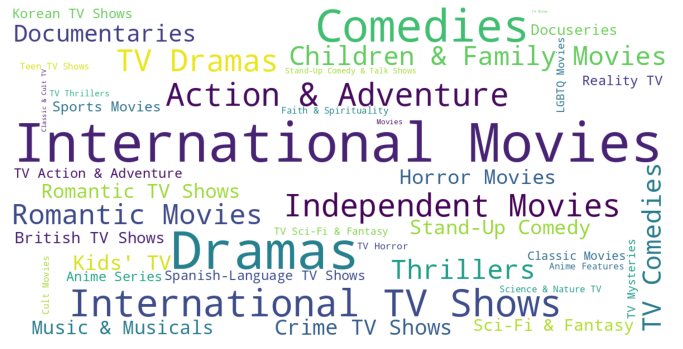

In [12]:
tb.word_cloud(genre)

<div class="alert alert-info">
<b>[Remark] Before you can plot...</b> <br>
Most graphical representations use numbers to determine how data should be plotted. Here, the dataset you are working with contains many non-numerical data types. Actually, all but the new features are strings (<samp>str</samp>). Sometimes, features are categorical, i.e., the set of possible values is finite (e.g.: <samp>type</samp> can only be <samp>"Movie"</samp> or <samp>"TV Show"</samp>). For those cases, it can be good practice to replace each category by a unique number (see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder"target="_blank">Ordinal Encoder</a>). In other cases, features can take an infinite amount of value, such as for the <samp>description</samp>, and pre-processing must be done to take valuable information about it.
</div>

Here, we propose a very simple way of turning all the dataset features into numerical ones, or dropping them.
Note that <b>you are not obliged</b> to encode your features into numerical ones. We just let you know how to deal with that task if this is something you consider doing.

In [13]:
"""
CELL N°8 : OTHER NEW FEATURES
Example of feature encoding and numeric types selection. 
"""

try:
    dataset["type"] = dataset["type"].str.contains("Movie").astype(int)  # Maybe
    dataset["release_year"] = dataset["release_year"].astype(int)

    reworked_durations = []
    for duration in dataset["duration"]:
        num_time, scale = duration.split()
        if scale == "min":
            reworked_durations.append(int(num_time))
        else:
            reworked_durations.append(
                int(num_time) * 180
            )  # let us assume that a single season lasts for 3 hours :)
    dataset["duration"] = reworked_durations
except KeyError:
    pass  # For more robustness, we should do three try-except,
    # one for each feature in [`type`, `release_year`, `duration`]

numeric_dataset = dataset.select_dtypes(["number"])  # Selecting only number types

numeric_dataset.head()

,type,release_year,duration,Anupam Kher,Shah Rukh Khan,Om Puri,Naseeruddin Shah,Akshay Kumar,Takahiro Sakurai,Boman Irani,...,Cult Movies,Teen TV Shows,Anime Features,Science & Nature TV,Faith & Spirituality,TV Thrillers,Stand-Up Comedy & Talk Shows,Movies,Classic & Cult TV,TV Shows
0,0,2020,720,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2016,93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2011,78,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,2009,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2008,123,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-success">
<b>[Bonus]</b>  <br>
As you can probably see, many of the rating categories are quite similar. This leverages some crucial questions such as the importance of keeping all categories distinct or merging some of them together. The lower the number of classes, the better the classification?
    
Well you must find it by yourself! We have created a function that shows the distribution of ratings among the dataset (see below). You are allowed to modify the classes by remapping some of them into others, or by re-creating totally new ones.
   
<b>Nonetheless</b>, your new mapping must satisfy the following rules:
<ol>
    <li> there must be at least 4 different rating classes
   <li> no class should contain more than 60% of the dataset
</ol>
</div> 

In [14]:
"""
CELL N°9 : RATINGS FREQUENCY AMONG SAMPLE
"""

tb.get_ratings_freq(dataset)

TV-MA       0.368809
R           0.098600
PG-13       0.056450
TV-14       0.246274
TV-PG       0.094385
TV-G        0.021978
TV-Y        0.028903
NR          0.009935
TV-Y7       0.031311
PG          0.035827
G           0.005720
NC-17       0.000452
TV-Y7-FV    0.000602
UR          0.000753
dtype: float64

In [15]:
"""
CELL N°10 : RE-ENCODING TARGET FEATURE
Feel free to comment or modify this section.
"""

#########################################################################################################
# Start : Student version
#########################################################################################################

# Exemple of (weird) mapping that satisfies requirements
mapping = {
    "TV-MA": "ADULT",
    "R": "ADULT",
    "PG-13": "TEEN",
    "TV-14": "TEEN",
    "TV-PG": "GENERAL",
    "NR": "NR",
    "TV-G": "GENERAL",
    "TV-Y": "YOUNG",
    "TV-Y7": "YOUNG",
    "PG": "GENERAL",
    "G": "GENERAL",
    "NC-17": "ADULT",
    "TV-Y7-FV": "ADULT",
    "UR": "NR",
}

# Uncomment to update ratings
tb.update_rating(dataset, mapping)

#########################################################################################################
# End : Student version
#########################################################################################################

tb.get_ratings_freq(dataset)

ADULT      0.468463
TEEN       0.302725
GENERAL    0.157911
YOUNG      0.060214
NR         0.010688
dtype: float64

<br><font size=7 color=#009999> <b>PART 2 - DATA VISUALIZATION</b> </font> <br><br>

<br>
<font size=5 color=#009999> <b>2.1 - PCA</b> <br>
REDUCE THE DIMENSIONALITY OF THE DATA IN ORDER TO OBSERVE IT
</font> <br> <br>

The high dimensionality of the dataset (number of columns) makes data visualization hard. In order to gain some (partial) information about our data distribution, we propose to perform a 3-dimensional visualization of them. For this purpose, we need to reduce dimensionality of our feature space while keeping as much information as possible about the data. 

PCA is often considered as the simplest and most fundamental technique used in dimensionality reduction. Remember that PCA is essentially the rotation of coordinate axes, chosen such that each successful axis captures or preserves as much variance as possible. If the algorithm returns a new system coordinates of the same dimension as the input, we can keep only the axis corresponding to the 3 largest singular values and project data on this coordinate system to perform the visualization.


![PCAUrl](https://miro.medium.com/max/400/1*ZXhPoYQIn-Y8mxoUpz5Ayw.gif "PCA")


<div class="alert alert-warning">
<b>[Question 2.1] Clusters visualization </b>  <br>
    Use the <samp>group_visualization</samp> function provided in the toolbox (<i>toolbox.py</i>) below to perform a 3-dimensional scatter plot of a <b>numerical</b> version of your data. 
Does the clustering problem seem to be difficult? Are the clusters separable? 
</div> 

In [58]:
"""
CELL N°11 : DATASET VISUALIZATION
Apply PCA on the numerical part of your dataset. Keep the 2-3 most relevant PCA components to reduce
the dimensionality of the inherent numerical data matrix. Then, plot the samples in the coordinate space of the 3 most 
relevant components with the group_visualization function. 
"""

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

target = dataset.rating.values

#########################################################################################################
# Start : Student version
#########################################################################################################

numeric_dataset = scale(numeric_dataset)

# pca2d = PCA(n_components=2)
# pca2d.fit(numeric_dataset)
# X_2d = pca2d.transform(numeric_dataset)

pca3d = PCA(n_components=3)
pca3d.fit(numeric_dataset)
X = pca3d.transform(numeric_dataset)

#########################################################################################################
# End : Student version
#########################################################################################################

tb.group_visualization(target, X, less_points=False)
#tb.group_visualization(target, X, less_points=False, save_fig="plot3D.pdf")
#tb.group_visualization(target, X_2d, less_points=True, save_fig="plot2D.pdf")

['ADULT' 'ADULT' 'ADULT' ... 'ADULT' 'TEEN' 'GENERAL']


<br>
<font size=7 color=#009999> <b>PART 3 - IT'S TIME TO ... CLUSTER!</b> </font> <br><br>

<br>
<font size=5 color=#009999> <b>3.1 - Clustering: definition </b> <br>
THE ABC OF CLUSTERING
</font> <br> <br>

Clustering can be defined as the task of *grouping* objects from a set $S$ (here, each row/observation is an object) in such a way that objects assigned to the same group (called cluster) are more **similar** (or less **distant**) with respect to each other (in some sense) than to those assigned to the other groups. Usually, we would like to divide our objects into $K$ groups.

As such, clustering reduces to finding, among all $K$-partitions possible of $S$, the partition $\mathcal{P}$ that minimizes some error criterion $f(\mathcal{P})$. Each object will be assigned a cluster, $C_i$, and each cluster will have its centroid $c_i$ the distance between **any object** in $C_i$ to centroid $c_i$ is **always smaller** that the distance to any other centroid. In other words, each object is assigned to the cluster whose centroid is the closest.


A mathematical formulation of the problem could be the following, $$ \boxed{\min_{(C_1,\dots,C_K) \,\in\, \mathcal{P}}\,f(C_1,\dots,C_K) = \sum_{i = 1}^{K}\,\sum_{x \in C_i}\,\Delta(x,c_i)}$$

where $\Delta(x,c_i)$ denotes the distance between object $x$ and centroid $c_i$.

<br>
<font size=5 color=#009999> <b>3.2 - Clustering: example </b> <br>
EXAMPLE OF SEPARATING OBJECTS INTO 10 CLUSTERS
</font> <br> <br>

**First**, let us imagine the following 2D dataset.

<img src="Imgs/10-partitions-data.svg" width = "250">

**Then**, a 10-partition is defined by the position of the centroids, one for each cluster. Below, you can observe four examples of (random) centroids localizations (stars).

<img src="Imgs/10-partitions-chose-centroids.svg" width = "1000">

**Next**, the regions are colored based on their closest centroid. Here, we take the distance to be the Euclidean distance.

<img src="Imgs/10-partitions-centroids.svg" width = "1000">

**Finally**, data points (objects) are colored based in the region they are in.

<img src="Imgs/10-partitions-clusters.svg" width = "1000">

<br>
<font size=5 color=#009999> <b>3.3 - Customized clustering with K-Prototypes </b> <br>
DEFINE YOUR OWN DISTANCE FUNCTION AND IMPLEMENT A CLUSTERING ALGORITHM
</font> <br> <br>

In the example above, the distance was the well-known Euclidean distance. However, a variety of metrics can be used and what you will use depends on the problem your are working on. [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#pairwise-metrics) offers many possibilities, but we encourage you to implement yours!

For your $\Delta$ function to be valid, it should admit the following properties:

1. $\Delta(a,b) = 0 \Longleftrightarrow a = b$
2. $\Delta(a,b) = \Delta(b,a)$
3. $\Delta(a,b) \in [0,\infty[$

In many cases, the centroids localization is not optimal. Therefore, after clustering, objects in each cluster can choose a new centroid for their cluster.

The computation if the new centroid is performed with,
$$\boxed{ c_i \gets \arg \min_{c}\, \frac{1}{|C_i|} \sum_{x \in C_i}
\,\Delta^2(x,c)}$$

where $c$ can be any vector (object) and $|C_i|$ refers to the number of objects in the clusters.

Typically, if one uses the Euclidean distance $\Delta(a,b) = ||a-b||_2$, then $c_i$ simply stands as the **mean** vector of its inherent cluster, 

$$ c_i = \frac{1}{|C_i|} \sum_{x \in C_i} \,x $$

A $K$-Prototypes methods is therefore an algorithm that divides the observation set into $K$ clusters, by applying an arbitrary distance metric.

<div class="alert alert-info">
<b>[Remark] Centroids are not observations </b>  <br>
    <b>Centroids</b> do not necessarily belong to the set of observations, $S$. They represent as much as possible their cluster as being, in <i>average</i>, the most similar to the objects within the cluster.
</div>

The goal of our $K$-Prototypes method it to return $K$ centroids from a suitable $K$ partition of your dataset and assign each object to its most **similar** centroid.

For this purpose, the algorithm iterates between two steps until a stopping criteria is reached (i.e., data points are assigned to the same cluster, maximum number of iterations, ...). Let $(C_{1,t},\dots,C_{K,t})$ and $(c_{1,t},\dots,c_{K,t})$ respectively represent the current **clusters** and **centroids** after $t$ iterations. 

Then, one iteration of the algorithm can divided into two parts:
1. **Data assignment step:** each data point $x \in S$ is assigned to its closest centroid.    
2. **Centroid update step:** new **centroids** $c_{i,t+1}$ are computed, and if possible such that the sum of squared distances in minimized.

As detailed aboved, steps are repeated until convergence is observe or a maximum number of iterations has been performed.

<div class="alert alert-info">
<b>[Remark] Empty clusters </b>  <br>
    At this step, what could happend one cluster becomes *depleted* (i.e., empty)? Find a way to handle properly such a situation.
</div>

<div class="alert alert-info">
<b>[Remark] Convergence </b>  <br>
    K-Prototypes algorithm is guaranteed to converge to a result. However, the result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.
</div>  

<div class="alert alert-warning">
<b>[Question 3.1] Convergence of your centroids </b>  <br>
    How can you determine if your centroids are converging or not?
</div>

<div class="alert alert-success">
<b>Example</b>  <br>
K-Means is K-Prototypes in the Euclidean setting described above. One equivalently tries to minimize the error criterion <i>Sum of Squared Squares</i> : $$f(\mathcal{P}) = \sum_{i=1}^{K}\,\sum_{x \in C_i} ||a-b||_2^2$$
</div> 

![KMeansUrl](https://dashee87.github.io/images/kmeans.gif "KMeans")

<div class="alert alert-warning">
<b>[Question 3.2] Implement a meaningful distance function $\Delta$. </b>  <br>
    Based on the data types of your final dataset (after feature selection/extraction), define an appropriate $\Delta$ function to be used within your <br>$K$-Prototypes. Discuss your decision and the potential impact it can have on determining the optimal centroid location.
</div> 

<div class="alert alert-info">
<b>[Remark] Distance on categorical data </b>  <br>
    Until here, we presented results on numerical data. However, you can also define distance function that work with categorical data (e.g., the movie type), something that could be applied here. You can find examples <a href="https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb">here</a>.
</div>  

In [17]:
"""
CELL N°12 : DISTANCE METRIC
Based on the templates below, define a custom metric for your needs.
"""


def delta_euclidian(a, b, weights=None):
    # Same as `scipy.spatial.distance.euclidean`
    if weights is None:
        weights = np.ones(len(a))
    return sum(weights * (a - b) ** 2)


def delta_mode(a, b, weights=None):
    if weights is None:
        weights = np.ones(len(a))
    return sum(weights * (a != b))


# Your metric
def distance_metric(a, b, **kwargs):
    """
    A pairwise distance between vectors a and b.

    :param a: a vector
    :param b: a vector
    :param kwargs: any keyword arguments you would like to add..
    """
    #########################################################################################################
    # Start : Student version
    #########################################################################################################

    sum_euclidian = 0
    sum_mode = 0

    list_euclidian_a = []
    list_mode_a = []
    list_euclidian_b = []
    list_mode_b = []

    for i in range(len(a)):
        if type(a[i]) == np.float64:
            list_euclidian_a.append(a[i])
            list_euclidian_b.append(b[i])
        else:
            list_mode_a.append(a[i])
            list_mode_b.append(b[i])

    if kwargs.get("weights") is None:
        param = np.ones(len(a))
    else:
        param = kwargs.get("weights")
    if (len(list_mode_a) != 0):
        sum_mode = delta_mode(np.array(list_mode_a), np.array(list_mode_b), weights=param)
    if (len(list_euclidian_a) != 0):
        sum_euclidian = delta_euclidian(np.array(list_euclidian_a), np.array(list_euclidian_b), None)

    return sum_euclidian + sum_mode


    #########################################################################################################
    # End : Student version
    #########################################################################################################

In [18]:
"""
CELL N°13 : K-PROTOTYPES IMPLEMENTATION
Implement here your K-Prototypes algorithm.
"""


def KPrototypes(
    X,
    k=5,
    n_max=100,
    metric=distance_metric,
    **kwargs,
):
    """
    Run a K-Prototypes algorithm on input data.

    :param X: m-by-n observation matrix or DataFrame
    :param k: number of clusters
    :param n_max: maximum number of iterations
    :param metric: the distance metric to use
    :param kwargs: optional arguments to be passed to `metric`
    :return: the cluster labels and the centroids
    """

    #########################################################################################################
    # Start : Student version
    #########################################################################################################


    n_points = len(X)
    dim = len(X[0])

    ## usefull functions
    def nearest_centroid(i, centroids):
        # retourne l' index du centroid le plus proche
        index = 0
        distance_min = metric(X[i], centroids[0])
        for j in range(1, k):
            distance = metric(X[i], centroids[j])
            if (distance < distance_min):
                distance_min = distance
                index = j
        return index

    def clustering_points(centroids):
        # attribue chaque point au centroide le plus proche
        new_cluster_labels = np.zeros(n_points)
        for i in range(n_points):
            new_cluster_labels[i] = nearest_centroid(i, centroids)
        return new_cluster_labels

    def new_centroid(cluster):
        # nouveau centroid= nouveau point avec pour composante la moyenne des composante des points x
        # assignés au cluster
        centroid = [0] * dim
        for i in range(dim):
            if type(X[0][i]) == np.float64:
                s = 0
                for j in cluster:
                    s += X[j][i]
                centroid[i] = s / cluster.size
            else:
                list = [X[m][i] for m in cluster]
                dict = {}
                count = 0
                most_occurent = 0
                for j in list:
                    dict[j] = dict.get(j, 0) + 1
                    if dict[j] >= count:
                        count = dict[j]
                        most_occurent = j
                centroid[i] = most_occurent
        return centroid

    def update_centroids(clusters):
        # mets a jour les k centroids
        centroids = [0] * k
        for i in range(k):
            cluster_i = np.where(clusters == i)[0]
            centroids[i] = new_centroid(cluster_i)
        return centroids

    def check(centroids, old_centroids):
        for i in range(len(centroids)):
            for j in range(dim):
                if centroids[i][j] != old_centroids[i][j]:
                    return True
        return False

    ### initialisation
    index_init_centroids = np.random.choice(np.arange(0, n_points), k, replace=False)
    centroids = [X[i] for i in index_init_centroids]
    old_centroids = centroids
    i = 0
    cluster_labels = np.ones(n_points) * (-1)
    run = True

    ## k-means
    while run and i < n_max:
        cluster_labels = clustering_points(centroids)
        centroids = update_centroids(cluster_labels)

        # run conditions
        run = check(centroids, old_centroids)

        # increment
        old_centroids = centroids
        i += 1

    #########################################################################################################
    # End : Student version
    #########################################################################################################


    # Return the results

    return cluster_labels, centroids

<div class="alert alert-warning">
<b> Apply the K-Prototypes clustering algorithm on your dataset. </b>  <br>
</div>

<div class="alert alert-info">
<b>[Remark] K-Prototypes can be slow </b>  <br>
    Depending on how you implement $K$-Prototypes, or even your $\Delta$ function, the processing of your dataset can take from a few seconds to minutes. For debugging purpose, we encourage you to downsample your dataset to reduce computation time. To this end, we provide you with the necessary code below.
</div>  

In [19]:
"""
CELL N°14 : DOWNSAMPLING
Optionally, downsample your dataset.
"""

# Set to True if you would like to downsample
downsample = False

if downsample:

    fraction = 0.3  # % of dataset you will consider for the rest of your analysis
    assert 0 < fraction <= 1

    uniques = np.unique(target)

    n = len(target)
    size = int(n * fraction)

    selected = np.zeros_like(target, dtype=bool)

    for unique in uniques:
        indices = np.argwhere(target == unique).flatten()
        size = max(1, int(len(indices) * fraction))
        indices = np.random.choice(indices, size=size, replace=False)
        selected[indices] = True

    target = target[selected]
    X = X[selected, :]

In [106]:
"""
CELL N°15 : K-PROTOTYPES EXECUTION
Simply run this cell.
"""

k = min(5, len(np.unique(target)))

use_KPrototype = True  # Set to True when ready to test your implementation

if use_KPrototype:
    cluster_labels, centroids = KPrototypes(X, k=k)
    print(centroids)
else:

    from sklearn.cluster import KMeans

    kmeans = KMeans(n_clusters=k, random_state=0)

    cluster_labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

[[1.4500635867371408, -0.9135593233458457, 2.094915275336803], [-1.5669370514730814, 0.3888237290775286, -0.3304466859748475], [3.8777340305499877, -0.9066480619978431, -0.8729142177865616], [-0.6668055769111277, 0.2500096300963014, 1.072186435718952], [-3.249257641525008, 1.1777155458249546, -5.0420102504577535]]


<br>
<font size=5 color=#009999> <b>3.2 - RESULTS ANALYSIS </b> <br>
OBSERVE AND COMPARE
</font> <br> <br>

In this section, we adress the difficult task of evaluating the performance of the clustering algorithm. We suggest you to work in 3 steps : 
<br> 
1. <b>Look at the result.</b> Before any quantitative study, you should look at your clustering in the low dimensional space. It should help you to get some insight. We already made this step in part 2. 
<br><br>    
2. <b>Perform a silhouette analysis.</b> One way to assess the quality of the data partitionning is the use of the silhouette analysis. Each silhouette shows which object lies well within their cluster, and which one is merely somewhere in between clusters. The entire clustering is displayed by combining the silhouettes into a single plot, allowing an appreciation of the relative quality of the clusters and an overview of the data configuration. The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.
<br><br>
3. <b>Compute the confusion matrices.</b> In the context where some labeled data are available for assigning clusters to known labels, we need to find which cluster corresponds to which label. For this purpose we have to find the label permutation that leads to the best [accuracy](https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/). As there are $K!$ permutations, testing all of them is not a viable solution. Therefore, we encourage you to manually test some permutations and, then, derive a method to find a good permutation (without trying all of them!).

In [76]:
"""
CELL N°16 : PAIRWISE DISTANCE.
Warning: if you use your own metric, it might take much longer to compute.
"""
distance_matrix = tb.pairwise_distance(X, metric="euclidean")

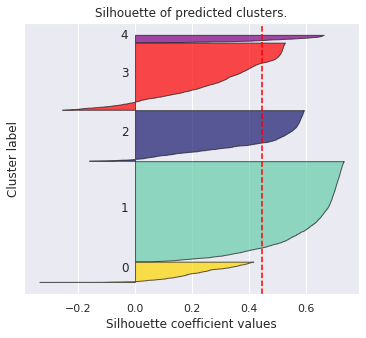

In [107]:
"""
CELL N°17 : SILHOUETTE ANALYSIS
Analyse how your clustering algorithm performs.
"""
tb.silhouette_visualization(cluster_labels, distance_matrix)

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [111]:
"""
CELL N°18 : CONFUSION MATRIX
Observe the impact of your cluster mapping on the confusion matrix, and try to determine to best mapping possible.
"""

n_target = dict()
for i in target:
    n_target[i] = n_target.get(i, 0) + 1
print(n_target)
sort_n_target = sorted(n_target.items(), key=lambda x:x[1])
print(sort_n_target) 

n_kmeans = dict()
for i in cluster_labels:
    n_kmeans[i] = n_kmeans.get(i, 0) + 1
print(n_kmeans)
sort_n_kmeans = sorted(n_kmeans.items(), key=lambda x:x[1])
print(sort_n_kmeans) 

cluster_mapping = dict()
for i,j in zip(sort_n_kmeans, sort_n_target):
    cluster_mapping[i[0]] = j[0]

# cluster_mapping = {0: "GENERAL", 1: "ADULT", 2: "TEEN", 3: "YOUNG", 4: "NR"}
print(cluster_mapping)

tb.confusion_matrix_visualization(target, cluster_labels, cluster_mapping)

{'ADULT': 3112, 'TEEN': 2011, 'GENERAL': 1049, 'YOUNG': 400, 'NR': 71}
[('NR', 71), ('YOUNG', 400), ('GENERAL', 1049), ('TEEN', 2011), ('ADULT', 3112)]
{2.0: 1369, 1.0: 2708, 3.0: 1817, 0.0: 549, 4.0: 200}
[(4.0, 200), (0.0, 549), (2.0, 1369), (3.0, 1817), (1.0, 2708)]
{4.0: 'NR', 0.0: 'YOUNG', 2.0: 'GENERAL', 3.0: 'TEEN', 1.0: 'ADULT'}
6643


<div class="alert alert-warning">
    <b>[Question 3.3] Silhouette plots</b>  <br> 
    Analyze results of your clustering method thanks to <i>Silhouette</i> graphs as well as <i>Confusion</i> matrices. <br>
    Try to be quite exhaustive and present/comment your findings to prove us you have taught about great features :)
</div> 

<div class="alert alert-warning">
    <b>[Question 3.4] Mapping clusters to ratings</b>  <br> 
    Given all the possible permutations, how would do to determine a good cluster mapping, i.e., a permutation with a high accuracy, without testing all possible mappings?
</div>

Now, you should be able to create a complete pipeline, from start to end, that can train a model on a data, and output some prediction for a given input vector. **However**, you do not have to implement such thing here. This will be seen during, e.g., the Machine Learning [LELEC2870](https://uclouvain.be/en-cours-2021-lelec2870) classes.